<H1 style = 'color:blue' align = 'center'> <b>Heart Diseases Prediction using ML</b></h1>

This is a classification problem to classify the Heart Disesas...

# Steps involved to complete this steps...
<p> 1. Importing the depandencies...</p>
<p> 2. Data collection and Processing...</p>
<p> 3. Model Training ... </p>
<p> 4. Model testing...</p>

In [1]:
# Import required moduiles...

import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# load the csv file to a dataframe...

df = pd.read_csv('heart_ds.csv')

In [3]:
# Print the top 5 data point of the dataset...

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# To get basic knowldage of dataset...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Is the data balanced ?...

df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

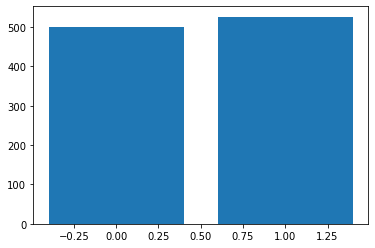

In [6]:
# Check throught graph...

plt.bar([1,0], df['target'].value_counts())
plt.show()

1 --> Defective Heart

0 --> Healthy Heart

In [7]:
skew(df)

array([-0.24850156, -0.85020237,  0.52868008,  0.7386852 ,  1.07250033,
        1.96845247,  0.18017624, -0.513025  ,  0.69164112,  1.20912662,
       -0.47843296,  1.25934225, -0.52362206, -0.05270121])

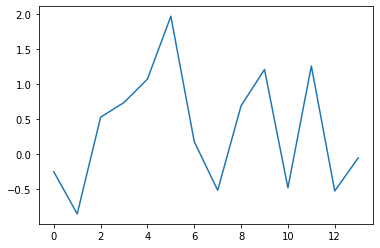

In [8]:
plt.plot(skew(df))

In [9]:
# Splitting the Feature and Target...

X = df.drop(columns = 'target', axis = 1)
Y = df['target']

In [10]:
# Splitting data into train and test part...

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 2 )

In [11]:
print(X.shape, x_train.shape, x_test.shape)

(1025, 13) (768, 13) (257, 13)


In [12]:
# Train The Model...

model = LogisticRegression()

In [13]:
# Train the model...

model.fit(x_train, y_train)

C:\Users\M.SAKSHAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Check the accouracy score...

x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)


In [15]:
print('Accuracy on Trainging data : ', training_data_accuracy)
training_data_accuracy

Accuracy on Trainging data :  0.86328125


0.86328125

In [16]:
# Make the prediction using test data...

x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [17]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7937743190661478


In [18]:
# Building a Predictive System

input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)


# change the input data to a numpy array

input_data_as_numpy_array= np.asarray(input_data)


# reshape the numpy array as we are predicting for only on instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\M.SAKSHAM\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
cm = confusion_matrix(y_test,x_test_prediction)
print(cm)

[[ 91  34]
 [ 19 113]]


In [21]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
249,42,1,2,130,180,0,1,150,0,0.0,2,0,2
523,61,1,0,148,203,0,1,161,0,0.0,2,1,3
563,44,1,0,112,290,0,0,153,0,0.0,2,1,2
742,63,1,0,130,330,1,0,132,1,1.8,2,3,3
103,47,1,2,138,257,0,0,156,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,51,1,2,100,222,0,1,143,1,1.2,1,0,2
292,61,1,2,150,243,1,1,137,1,1.0,1,0,2
308,59,1,2,126,218,1,1,134,0,2.2,1,1,1
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3
